# Candy Recommendation

**Question**: What is a good variety of candies to have?

**Solution**: Use Principal Component Analysis to better visualize the data and find patterns.

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Step 2: Load Candy Data

In [2]:
# read in candy data
data = pd.read_csv('../Exercises/candy_data.csv')
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch√ïs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther√ïs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [3]:
# only look at the 1/0 columns
subset = data.loc[:, data.columns[2:-5]]
subset

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard
0,0,1,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
80,1,0,0,0,0,0
81,1,0,0,0,0,1
82,1,0,0,0,0,0
83,0,1,0,0,0,1


## Step 3: Apply PCA Algorithm

In [4]:
# turn the 9 dimensions into 2 dimensions
pca = PCA(n_components=2)
pca.fit(subset);

In [5]:
# amount of variance captured in 2 dimensions
pca.explained_variance_ratio_

array([0.43290298, 0.16722013])

In [6]:
# coordinates in 2 dimensions
candy_2d = pd.DataFrame(pca.transform(subset))
candy_2d

,0,1
0,0.723280,0.848156
1,0.460522,0.019969
2,0.278990,-0.119842
3,0.278990,-0.119842
4,-0.496506,-0.111473
...,...,...
80,-0.496506,-0.111473
81,-0.866044,0.162899
82,-0.496506,-0.111473
83,0.214931,0.921068


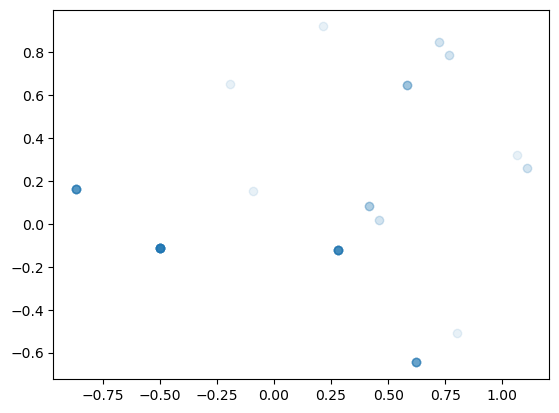

In [7]:
# show the points in 2 dimensional space
plt.scatter(candy_2d[0], candy_2d[1], alpha=.1);

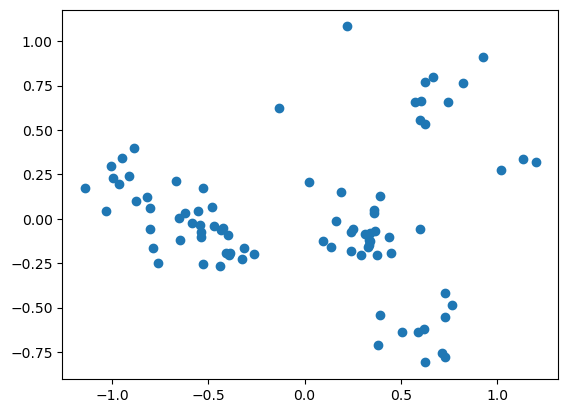

In [8]:
# add a little bit of noise to the points so they aren't on top of each other
x_jitter = candy_2d[0] + np.random.randn(85)*.1
y_jitter = candy_2d[1] + np.random.randn(85)*.1
plt.scatter(x_jitter, y_jitter);

In [9]:
# how to interpret new x-axis and y-axis
pca.components_

array([[-0.77549639,  0.30547877,  0.34133233,  0.181532  ,  0.1388108 ,
        -0.36953755],
       [ 0.00836847,  0.76653772, -0.52624781,  0.13981099,  0.2014595 ,
         0.27437216]])

## Step 4: Save Results to File

In [10]:
# add two columns to original data set
data.insert(len(data.columns), "pc1", x_jitter)
data.insert(len(data.columns), "pc2", y_jitter)
data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,pc1,pc2
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0.605331,0.662663
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0.597977,-0.059697
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.093554,-0.126470
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.373828,-0.201653
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,-0.409005,-0.193232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,-0.528865,0.174073
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,-1.005511,0.298289
82,Welch√ïs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,-0.482072,0.068488
83,Werther√ïs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,0.219428,1.083541


In [11]:
# export as csv file
data.to_csv('candy-data-pca.csv')